## LV_1. 실패율

슈퍼 게임 개발자 오렐리는 큰 고민에 빠졌다. 그녀가 만든 프랜즈 오천성이 대성공을 거뒀지만, 요즘 신규 사용자의 수가 급감한 것이다. 원인은 신규 사용자와 기존 사용자 사이에 스테이지 차이가 너무 큰 것이 문제였다.

이 문제를 어떻게 할까 고민 한 그녀는 동적으로 게임 시간을 늘려서 난이도를 조절하기로 했다. 역시 슈퍼 개발자라 대부분의 로직은 쉽게 구현했지만, 실패율을 구하는 부분에서 위기에 빠지고 말았다. 오렐리를 위해 실패율을 구하는 코드를 완성하라.

- 실패율은 다음과 같이 정의한다.
    - 스테이지에 도달했으나 아직 클리어하지 못한 플레이어의 수 / 스테이지에 도달한 플레이어 수
    
전체 스테이지의 개수 N, 게임을 이용하는 사용자가 현재 멈춰있는 스테이지의 번호가 담긴 배열 stages가 매개변수로 주어질 때, 실패율이 높은 스테이지부터 내림차순으로 스테이지의 번호가 담겨있는 배열을 return 하도록 solution 함수를 완성하라.

### 제한사항

- 스테이지의 개수 N은 1 이상 500 이하의 자연수이다.
- stages의 길이는 1 이상 200,000 이하이다.
- stages에는 1 이상 N + 1 이하의 자연수가 담겨있다.
    - 각 자연수는 사용자가 현재 도전 중인 스테이지의 번호를 나타낸다.
    - 단, N + 1 은 마지막 스테이지(N 번째 스테이지) 까지 클리어 한 사용자를 나타낸다.
- 만약 실패율이 같은 스테이지가 있다면 작은 번호의 스테이지가 먼저 오도록 하면 된다.
- 스테이지에 도달한 유저가 없는 경우 해당 스테이지의 실패율은 0 으로 정의한다.

### 입출력 예

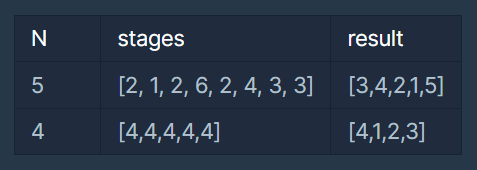

### 입출력 예 #1
1번 스테이지에는 총 8명의 사용자가 도전했으며, 이 중 1명의 사용자가 아직 클리어하지 못했다. 따라서 1번 스테이지의 실패율은 다음과 같다.

- 1 번 스테이지 실패율 : 1/8
2번 스테이지에는 총 7명의 사용자가 도전했으며, 이 중 3명의 사용자가 아직 클리어하지 못했다. 따라서 2번 스테이지의 실패율은 다음과 같다.

- 2 번 스테이지 실패율 : 3/7
마찬가지로 나머지 스테이지의 실패율은 다음과 같다.

- 3 번 스테이지 실패율 : 2/4
- 4번 스테이지 실패율 : 1/2
- 5번 스테이지 실패율 : 0/1
각 스테이지의 번호를 실패율의 내림차순으로 정렬하면 다음과 같다.

- [3,4,2,1,5]


### 입출력 예 #2

모든 사용자가 마지막 스테이지에 있으므로 4번 스테이지의 실패율은 1이며 나머지 스테이지의 실패율은 0이다.

- [4,1,2,3]

### 내 풀이

In [78]:
N = 5
stages = [2, 1, 2, 6, 2, 4, 3, 3]	

def solution(N, stages):
    stages_cnt = []
    fail_percentage = []
    for i in range(1,N+2):
        if stages.count(i) == 0:
            stages_cnt.append(0)
        else:
            stages_cnt.append(stages.count(i))


    for n, i in enumerate(stages_cnt):
        if i == 0:
            fail_percentage.append(0)
        else:
            fail_percentage.append(float(i / sum(stages_cnt[n:])))

    dic = { name : value for name, value in zip(list(range(1,N+1)), fail_percentage)}
    sorted_dict = sorted(dic.items(), key = lambda item: item[1], reverse = True)
    return [i[0] for i in sorted_dict]

solution(N, stages)

[3, 4, 2, 1, 5]

### 내 코드 개선(왜 성능이 더 안나오지...?)

In [85]:
N = 5
stages = [2, 1, 2, 6, 2, 4, 3, 3]	

def solution(N, stages):
    fail_percentage = []
    stage_counter = len(stages)

    for i in range(1,N+2):
        if stages.count(i) == 0:
            fail_percentage.append(0)
        else:
            fail_percentage.append(stages.count(i) / stage_counter)
            stage_counter -= stages.count(i)

    dic = { name : value for name, value in zip(list(range(1,N+1)), fail_percentage)}
    sorted_dict = sorted(dic.items(), key = lambda item: item[1], reverse = True)
    return [i[0] for i in sorted_dict]

solution(N, stages)

[3, 4, 2, 1, 5]

### 다른 사람 풀이

In [87]:
N = 5
stages = [2, 1, 2, 6, 2, 4, 3, 3]	
def solution(N, stages):
    result = {}
    denominator = len(stages)
    for stage in range(1, N+1):
        if denominator != 0:
            count = stages.count(stage)
            result[stage] = count / denominator
            denominator -= count
        else:
            result[stage] = 0
    return sorted(result, key=lambda x : result[x], reverse=True)

solution(N, stages)

[3, 4, 2, 1, 5]